## Using the Kaplan-Meier estimator with groups

In [1]:
# Import required libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [2]:
data = pd.read_csv("lung.csv")
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [3]:
# Organize our data :
# If status = 1 , then dead = 0
# If status = 2 , then dead = 1

data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0


In [5]:
# Group data by sex: kmf_m for males, kmf_f for females.

kmf_m = KaplanMeierFitter() 
kmf_f = KaplanMeierFitter() 

Male = data.query("sex == 1")
Female = data.query("sex == 2")

In [6]:
kmf_m.fit(durations =  Male["time"],event_observed   = Male["dead"] ,label="Male")
kmf_f.fit(durations =  Female["time"],event_observed = Female["dead"], label="Female")


<lifelines.KaplanMeierFitter:"Female", fitted with 90 total observations, 37 right-censored observations>

In [7]:
kmf_m.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,138,138
11.0,3,3,0,0,138
12.0,1,1,0,0,135
13.0,2,2,0,0,134
15.0,1,1,0,0,132
...,...,...,...,...,...
814.0,1,1,0,0,5
840.0,1,0,1,0,4
883.0,1,1,0,0,3


In [8]:
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,90,90
5.0,1,1,0,0,90
60.0,1,1,0,0,89
61.0,1,1,0,0,88
62.0,1,1,0,0,87
...,...,...,...,...,...
735.0,1,1,0,0,5
740.0,1,0,1,0,4
765.0,1,1,0,0,3


In [11]:
# predict survival probabilities by group (in this case, by sex)
print(kmf_m.predict(11))
print(kmf_f.predict(11))

0.9782608695652172
0.9888888888888887


In [13]:
# return complete list of survival_probability
kmf_m.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.053571
840.0,0.053571
883.0,0.035714


In [14]:
kmf_f.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.124822
740.0,0.124822
765.0,0.083214


Text(0.5, 1.0, 'KMF')

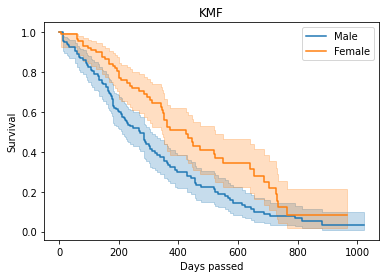

In [15]:
kmf_m.plot()
kmf_f.plot()

plt.xlabel("Days passed")
plt.ylabel("Survival")
plt.title("KMF")

In [16]:
kmf_m.cumulative_density_

,Male
timeline,
0.0,0.000000
11.0,0.021739
12.0,0.028986
13.0,0.043478
15.0,0.050725
...,...
814.0,0.946429
840.0,0.946429
883.0,0.964286


In [17]:
kmf_f.cumulative_density_

,Female
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022222
61.0,0.033333
62.0,0.044444
...,...
735.0,0.875178
740.0,0.875178
765.0,0.916786


<AxesSubplot:xlabel='timeline'>

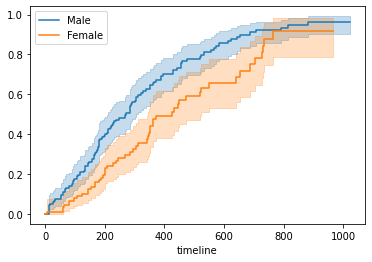

In [18]:
kmf_m.plot_cumulative_density()
kmf_f.plot_cumulative_density()

In [83]:
# Hazard FUnction :

from lifelines import NelsonAalenFitter

In [84]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

naf_m.fit(Male["time"],event_observed = Male["dead"])
naf_f.fit(Female["time"],event_observed = Female["dead"])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 90 total observations, 37 right-censored observations>

In [85]:
naf_m.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
11.0,0.021899
12.0,0.029306
13.0,0.044287
15.0,0.051863
...,...
814.0,2.831337
840.0,2.831337
883.0,3.164670


In [86]:
naf_f.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
5.0,0.011111
60.0,0.022347
61.0,0.033711
62.0,0.045205
...,...
735.0,1.988977
740.0,1.988977
765.0,2.322310


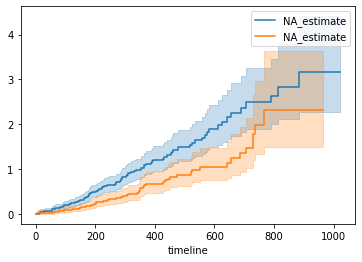

In [87]:
naf_m.plot_cumulative_hazard()
naf_f.plot_cumulative_hazard()

The cumulative hazard has less obvious understanding than the survival functions, but the hazard functions is the basis of more advanced techniques in survival analysis. Recall that we are estimating cumulative hazard functions, H(t). (Why? The sum of estimates is much more stable than the point-wise estimates.) Thus we know the rate of change of this curve is an estimate of the hazard function.

Looking at figure above, it looks like the hazard starts off high and gets smaller (as seen by the decreasing rate of change). Let’s break the regimes down between democratic and non-democratic, during the first 20 years:

In [92]:
# We can predict the value of a certain point :

naf_m.predict(1022)

3.1646698868981966

In [93]:
naf_f.predict(1022)

2.322310160585996

In [88]:
# Define variables :

T=Male['time']
E=Male['dead']
T1=Female['time']
E1=Female['dead']

In [89]:
from lifelines.statistics import logrank_test
results=logrank_test(T,T1,event_observed_A=E, event_observed_B=E1)
results.print_summary()